In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.__version__

'1.14.0'

# get the data from image_test1:

In [2]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

print(f'shape of X: {X.shape}')
print(f'length of y: {len(y)}')

shape of X: (24946, 100, 100, 1)
length of y: 24946


# Use a model similar to image_test2:

In [3]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# normalize:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(X.shape[1],X.shape[2], X.shape[3]))) # 70pixels x 70pixels x 1color

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.25, epochs = 10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 12534 samples, validate on 4179 samples
Epoch 1/10
12534/12534 [==============================] - 6s 483us/sample - loss: 0.7179 - acc: 0.5075 - val_loss: 0.6911 - val_acc: 0.5262
Epoch 2/10
12534/12534 [==============================] - 6s 447us/sample - loss: 0.6971 - acc: 0.5095 - val_loss: 0.6927 - val_acc: 0.5073
Epoch 3/10
12534/12534 [==============================] - 6s 498us/sample - loss: 0.6902 - acc: 0.5390 - val_loss: 0.6876 - val_acc: 0.4939
Epoch 4/10
12534/12534 [==============================] - 5s 431us/sample - loss: 0.6827 - acc: 0.5562 - val_loss: 0.6791 - val_acc: 0.5669
Epoch 5/10
12534/12534 [==============================] - 5s 425us/sample - loss: 0.6819 - acc: 0.5592 - val_loss: 0.6805 - val_acc: 0.5631
Epoch 6/10
12534/12534 [==============================] - 5s 418us/sample - loss: 0.6732 - acc: 0.5799 - val_loss: 0.6701 - val_acc: 

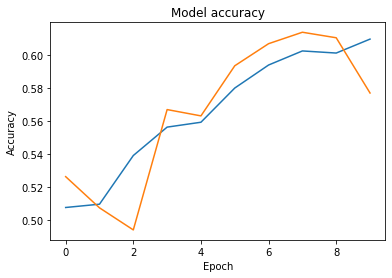

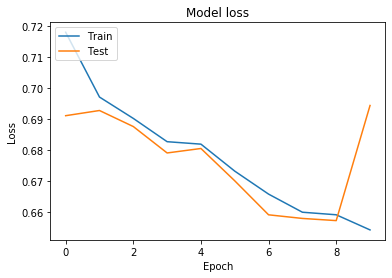

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left') # you only use train here..
plt.show()

In [7]:
#Final check
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f'validation loss: {val_loss}\n validation accuracy: {val_acc}')

8233/8233 [==============================] - 1s 142us/sample - loss: 0.7024 - acc: 0.5699
validation loss: 0.7023641440017855
 validation accuracy: 0.5699016451835632
